In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

#Packages from optimizing the model:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

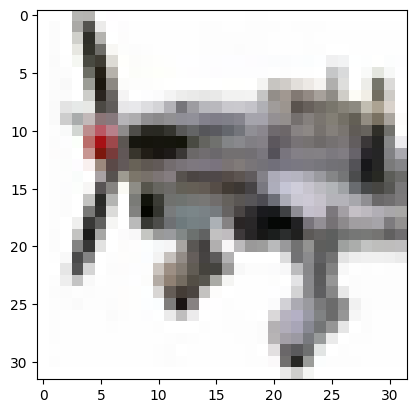

In [ ]:
plt.imshow(x_train[49])

In [ ]:
x_train=x_train.astype("float32") #Esta línea convierte el tipo de datos de las imágenes en el conjunto de entrenamiento xtrain a float32, pq las operaciones de punto flotante son mas adecuadas para la red
x_test=x_test.astype("float32")/255#convierte el tipo de datos de imagenes en el conjunto de prueba a float32, luego aplica normalizacion para que el entrenamiento sea mas eficiente quedan los pixeles entre 0 y 1

In [ ]:
len(np.unique(y_train)) #calcula el numero de clases unicas en el conjunto de datos de entrenamiento
# ytrain tiene las etiquetas de clases para los datos
#dice cuantas clases diferentes hay en los datos de entrenamiento

10

In [ ]:
#Codificación one hot en las etiquetas de clase de los conjuntos de datos de entrenamiento y prueba
y_train=to_categorical(y_train,10)# Esta línea convierte las etiquetas de clase en el conjunto de entrenamiento (y_train) a una representación one-hot. La representación one-hot es un vector donde todos los elementos son 0, excepto uno, que es 1 y corresponde a la clase de la imagen
y_test=to_categorical(y_test,10)#Esta línea hace lo mismo para las etiquetas de clase en el conjunto de prueba (y_test).

In [ ]:
y_train[4] #se está viendo el vector one hot de la 4 clase

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#operacion de normalizacion de los datos utilizando la media y la desviacion estandar
mean=np.mean(x_train)#media de los valores ed los pixeles en x train
sd=np.std(x_train)#desviacion estandar de los valores de los pixeles en x train

x_train=(x_train-mean)/(sd+1e-7)# Esta línea normaliza los valores de píxeles en el conjunto de datos de entrenamiento restando la media y dividiendo por la desviación estándar. Se agrega un número muy pequeño (1e-7) al denominador para evitar la división por cero en caso de que la desviación estándar sea cero.
x_test=(x_test-mean)/(sd+1e-7)#Esta línea hace lo mismo para el conjunto de datos de prueba (x_test), utilizando la media y la desviación estándar del conjunto de datos de entrenamiento. Es importante utilizar la misma media y desviación estándar para ambos conjuntos para que estén en la misma escala.

In [ ]:
#está dividiendo los datos de entrenamiento en dos conjuntos: un conjunto de entrenamiento y un conjunto de validación.
#Train_test_val_split:
(x_train,x_valid)=x_train[5000:],x_train[:5000]#Esta línea divide el conjunto de datos de imágenes de entrenamiento (x_train) en dos. Las primeras 5000 imágenes se asignan al conjunto de validación (x_valid), y el resto de las imágenes se mantienen en el conjunto de entrenamiento (x_train).
(y_train,y_valid)=y_train[5000:],y_train[:5000]#Esta línea hace lo mismo para las etiquetas de clase del conjunto de entrenamiento (y_train).
#El propósito de tener un conjunto de validación es poder evaluar el rendimiento del modelo en datos que no se utilizaron durante el entrenamiento, pero que aún así son similares a los datos de entrenamiento. Esto puede ayudar a detectar problemas como el sobreajuste, donde el modelo se desempeña bien en los datos de entrenamiento pero no en los datos nuevos.
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape#x_train.shape, y_train.shape, x_valid.shape, y_valid.shape imprimirá las dimensiones de los conjuntos de datos de entrenamiento y validación, tanto para las imágenes como para las etiquetas.

((45000, 32, 32, 3), (45000, 10), (5000, 32, 32, 3), (5000, 10))

In [ ]:
model_cifar10 = models.Sequential()
model_cifar10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cifar10.add(layers.MaxPooling2D((2, 2)))
model_cifar10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cifar10.add(layers.MaxPooling2D((2, 2)))
model_cifar10.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cifar10.add(layers.Flatten())
model_cifar10.add(layers.Dense(10, activation='softmax'))

In [ ]:
#arquitectura del modelo
model_cifar10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [ ]:
#configura el modelo para el entrenamiento, como se mide el rendimiento, como se actualizan los pesos y como se minimiza la perdida
model_cifar10.compile(metrics=["accuracy"],loss="categorical_crossentropy",optimizer=optimizers.Adam())


In [ ]:
#crea un punto de control (checkpoint) que guarda el mejor modelo durante el entrenamiento
checkpoint=ModelCheckpoint("best_model.hdf5",verbose=1,save_best_only=True,monitor="val_accuracy")
#"best_model.hdf5": Este es el nombre del archivo donde se guardará el modelo.
#verbose=1: Esto significa que se imprimirán mensajes detallados durante el entrenamiento cada vez que se guarda el modelo.
#save_best_only=True: Esto significa que sólo se guardará el modelo si su rendimiento en el conjunto de validación es el mejor hasta ahora. Si es False, se guardaría el modelo después de cada época, independientemente de su rendimiento.
#monitor="val_accuracy": Esto especifica la métrica que se utilizará para determinar cuál es el “mejor” modelo. En este caso, se está utilizando la precisión en el conjunto de validació

In [ ]:
history=model_cifar10.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
704/704 [==============================] - 69s 95ms/step - loss: 1.3989 - accuracy: 0.5004 - val_loss: 3.8696 - val_accuracy: 0.1000
Epoch 2/10
704/704 [==============================] - 75s 107ms/step - loss: 1.0145 - accuracy: 0.6478 - val_loss: 4.1937 - val_accuracy: 0.1000
Epoch 3/10
704/704 [==============================] - 71s 100ms/step - loss: 0.8568 - accuracy: 0.7040 - val_loss: 3.4805 - val_accuracy: 0.1000
Epoch 4/10
704/704 [==============================] - 69s 98ms/step - loss: 0.7456 - accuracy: 0.7435 - val_loss: 3.7772 - val_accuracy: 0.1000
Epoch 5/10
704/704 [==============================] - 67s 95ms/step - loss: 0.6628 - accuracy: 0.7718 - val_loss: 5.2225 - val_accuracy: 0.1000
Epoch 6/10
704/704 [==============================] - 66s 94ms/step - loss: 0.5943 - accuracy: 0.7939 - val_loss: 4.5934 - val_accuracy: 0.1000
Epoch 7/10
704/704 [==============================] - 67s 95ms/step - loss: 0.5208 - accuracy: 0.8201 - val_loss: 4.0115 - val_accurac

In [ ]:
model_cifar10.load_weights("/content/best_model.hdf5")

In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model_cifar10.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')
print(f'Pérdida en el conjunto de prueba: {loss}')

313/313 [==============================] - 5s 16ms/step - loss: 5.1354 - accuracy: 0.1000
Precisión en el conjunto de prueba: 10.00%
Pérdida en el conjunto de prueba: 5.135383129119873


In [ ]:
# Guardar el modelo
model_cifar10.save('cifar10_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


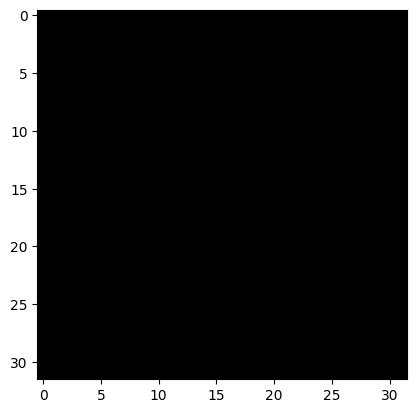

In [ ]:

plt.imshow(x_test[47,:,:], cmap='binary')

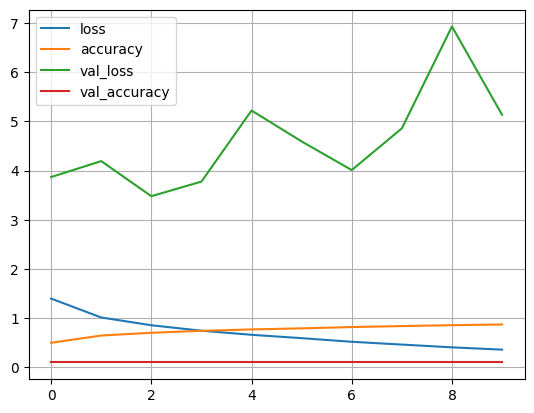

In [ ]:

pd.DataFrame(history.history).plot()
plt.grid(True)
